

# Show up for Appointment  Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

> The primary goal of this project is to investigate the factors that are likely to help predict if a patient will show up for their scheduled appointment.

__Question__ <br>
__1__  Which Gender group will likely show up for an appointment?<br>
__2__ Which age_group will likely show up for an appointment?<br>
__3__ Does location of a patient determine whether or not the patient will show up for appointemnt?<br>
__4__ Does sending a patient a reminder through sms determine whether or not the patient will show up for their appointment?<br>


In [3]:
# import statements for all of the packages that you
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

Now we check the  data for cleanliness i.e null values, duplicates. This will help understand the structure of the data. This will help determine if we need to make any changes.

### General Properties

In [4]:
df = pd.read_csv("No_appointment.csv")
df.shape ,df.info() ,df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


((110527, 14), None, 0)

> The Medical appointemnt dataset has 110527 rows(cases) and 14 columns(variables), with no missing values, with no duplicates as well<br>

__Data Dictionary__ <br> 
__01 - PatientId__ :Identification of a patient<br> 
__02 - AppointmentID__:Identification of each appointment<br> 
__03 - Gender__:Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.<br>
__04 - ScheduledDay__:The day of the actuall appointment, when they have to visit the doctor.<br>
__05 - AppointmentDay__:The day someone called or registered the appointment, this is before appointment of course.<br>
__06 - Age__:How old is the patient.<br>
__07 - Neighbourhood__:Where the appointment takes place.<br>
__08 - Scholarship__:True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia<br>
__09 - Hipertension__:True or False<br>
__10 - Diabetes__:True or False<br>
__11 - Alcoholism__:True or False<br>
__12 - Handcap__:True or False<br>
__13 - SMS_received___:1 or more messages sent to the patient.<br>
__14 - No-show__:True or False.<br>
___source Kaggle___



### Data Cleaning (Drop and Change some Columns)

In [5]:
## Now we drop two columns because its of less significance to our analysis.
df.drop(['ScheduledDay','AppointmentDay'], axis = 1, inplace=True)
## we aslo change the name names of  columns to lowercase for consistency 
df.columns = df.columns.str.lower()

#### Condensing the Age Column

In [8]:
ages = df.age
## We drop some ages, ages below -1 (because its unrealistic) and 
## ages above 100 - although its realistic but we still drop them.
bins = range(0, 100, 20)
labels = [f'{bins[i]} to {bins[i+1]}' for i in range(len(bins)-1)]
df["age_group"] = pd.cut(ages, bins,labels = labels, right=False)
df.head()

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60 to 80
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,40 to 60
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,60 to 80
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 to 20
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,40 to 60


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned the data, we move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 

Before we start , we expore the total number of patients that show up for their appointments. From the diagram below, we can see that most patient showed up for their appointments. <br>
__Note : it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.__

In [46]:
def count_plot(df, xvar, huevar=None, color=0, palette=None, order=None):
    ''' 
    This function takes a variable(dataframe),
    convert and display the count of variable and also
    plot the  count distribution of the variable
    '''
    # set plot dimensions 
    plt.figure(figsize = [14,6])
    #plot
    sns.countplot(data=df, x = xvar, hue=huevar, color=sns.color_palette()[color],palette=palette, order=order, edgecolor='black')
    # display proportions
    if huevar:
        display(df.groupby(xvar)[huevar].value_counts(normalize=True).mul(100).round(2).unstack().T)
    else:
        display(df[xvar].value_counts(normalize=True).mul(100).round(2).to_frame().T)
    # clean up variables names
    xvar=xvar.replace("_"," ") # replace _ with a space
    if huevar:
        huevar=huevar.replace("_"," ") 
    # Add title and format it
    plt.title(f'''Distribution of {xvar} {'by' if huevar else ''} {huevar if huevar else ''}'''.title(), fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xvar.title(), fontsize = 10, weight = 'bold')
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = "bold");
    
    

,No,Yes
no-show,79.81,20.19


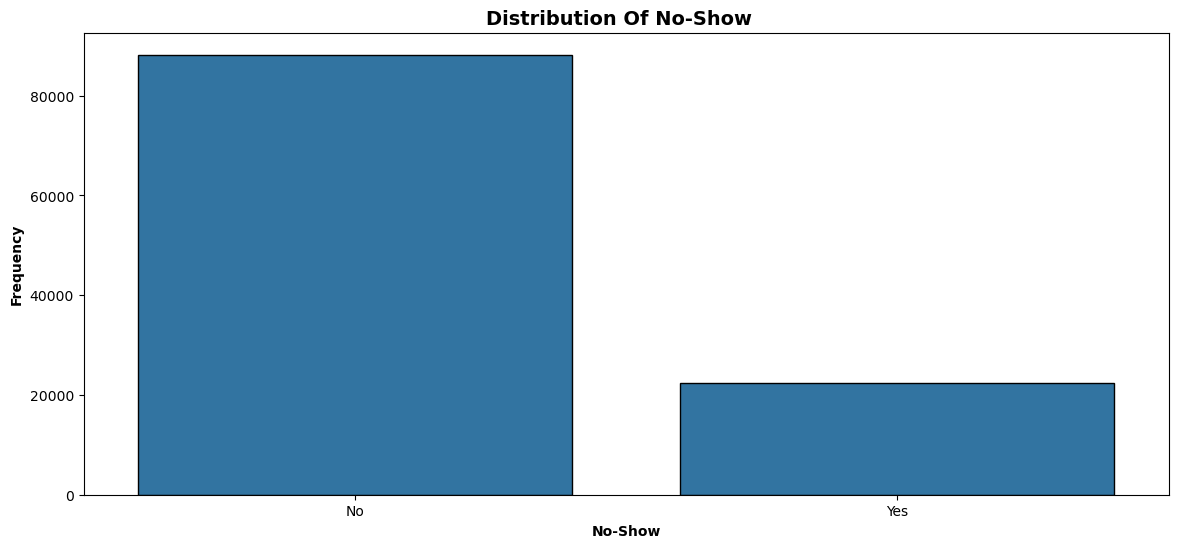

In [119]:
count_plot(df, 'no-show')

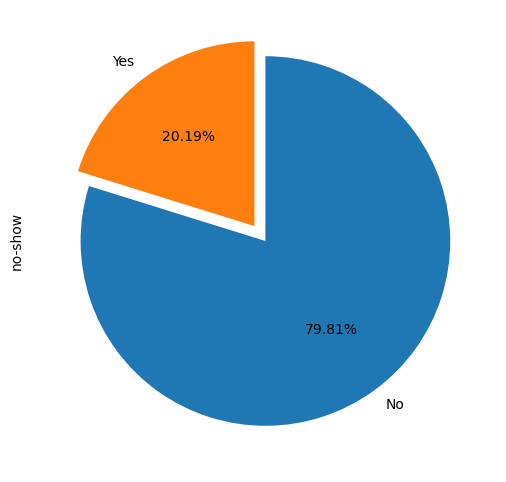

In [111]:
df['no-show'].value_counts().plot(kind='pie',figsize=(14,6), explode=[0,0.1], autopct='%1.2f%%', startangle = 90, counterclock = False);

__Question 1__ Which Gender group will likely show up for an appointment?

gender,F,M
no-show,,
No,79.69,80.03
Yes,20.31,19.97


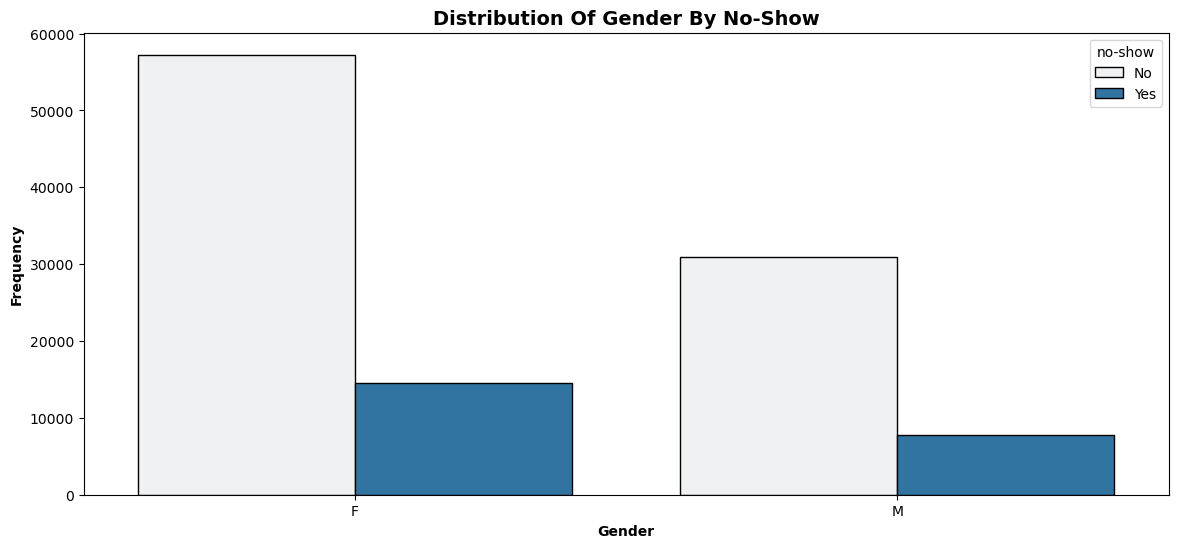

In [49]:
## Checks the number of males and females that show up for their appointment
count_plot(df, 'gender', huevar = "no-show")


__Answer__ About 30962 males shows up for their appointment and about 57246 females shows up for their appointment. Comparing males and females, most females shows up for their appointemnt. The number of females who does not show up for their appointment is also greater than that of males.

__Question 2__ Which age_group will likely show up for an appointment? 
For this question, we merge the ages columns into groups


age_group,0 to 20,20 to 40,40 to 60,60 to 80
no-show,,,,
No,77.83,76.86,81.19,84.88
Yes,22.17,23.14,18.81,15.12


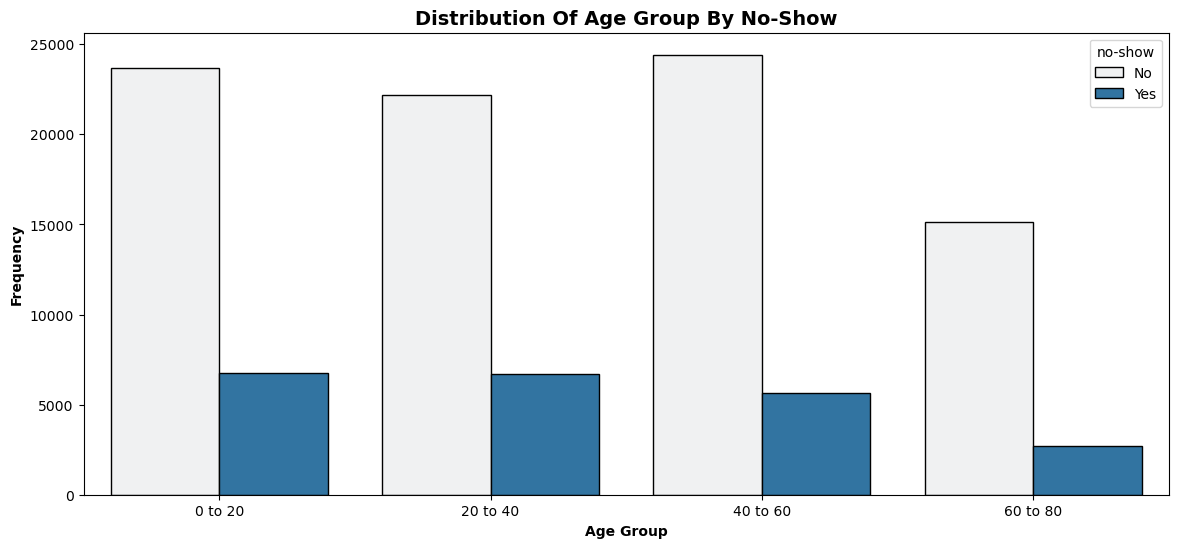

In [50]:
count_plot(df, 'age_group', huevar = "no-show")

__Answer__ From the graph above, comparing the age groups, patients within the ages of 40 to 60 has the highest proportion of attendance, whiles patients within the ages of 60 to 80 has the lowest number of appointment attendance.


__Question 3__
Does location of a patient determine whether or not the patient will show up for appointemnt?

In [88]:
df.groupby(['neighbourhood','no-show']).size().unstack().T


neighbourhood,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
no-show,,,,,,,,,,,,,,,,,,,,,
No,7.0,1741.0,221.0,220.0,332.0,1523.0,665.0,254.0,2223.0,1974.0,...,435.0,117.0,400.0,1152.0,1473.0,1549.0,1933.0,2559.0,120.0,710.0
Yes,1.0,521.0,50.0,62.0,91.0,384.0,193.0,58.0,550.0,591.0,...,112.0,28.0,69.0,287.0,363.0,428.0,515.0,573.0,32.0,141.0


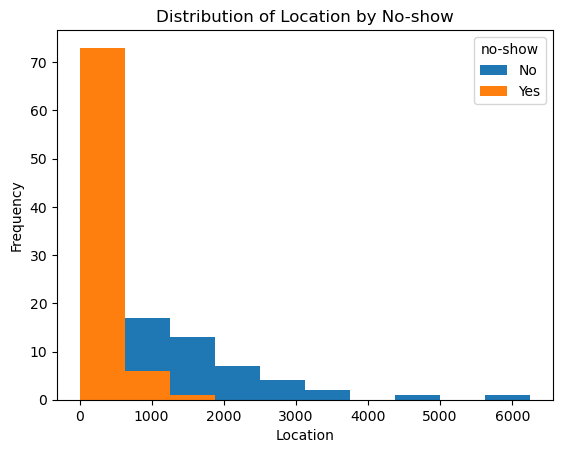

In [105]:
df.groupby(['neighbourhood','no-show']).size().unstack().plot(kind = 'hist').set( xlabel= 'Location', title='Distribution of Location by No-show');

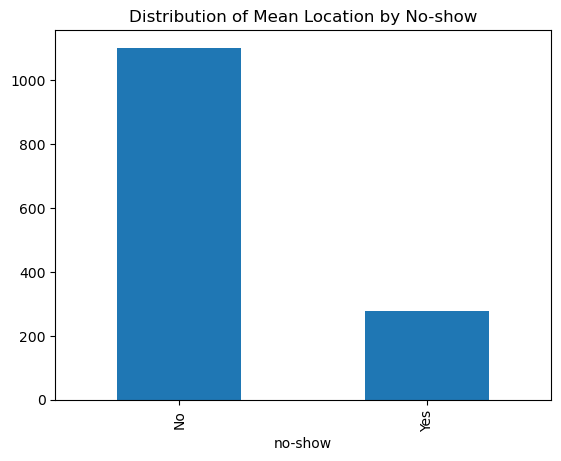

In [98]:
df.groupby(['neighbourhood','no-show']).size().unstack().mean().plot(kind = 'bar').set(title='Distribution of Mean Location by No-show');


__Answer__
From the histogram, the distribution of the two categories are right skewed. It seems where a patient is staying is a factor that determines whether or not a patients will show up for his appointement. The number of patient that showed up for their appointments is almost 4 times the number of patients that didn't show up for their appointements.

__Question 4__ <br>
Does sending a patient a reminder through sms determine whether or not the patient will show up for their appointment?

sms_received,0,1
no-show,,
No,83.3,72.43
Yes,16.7,27.57


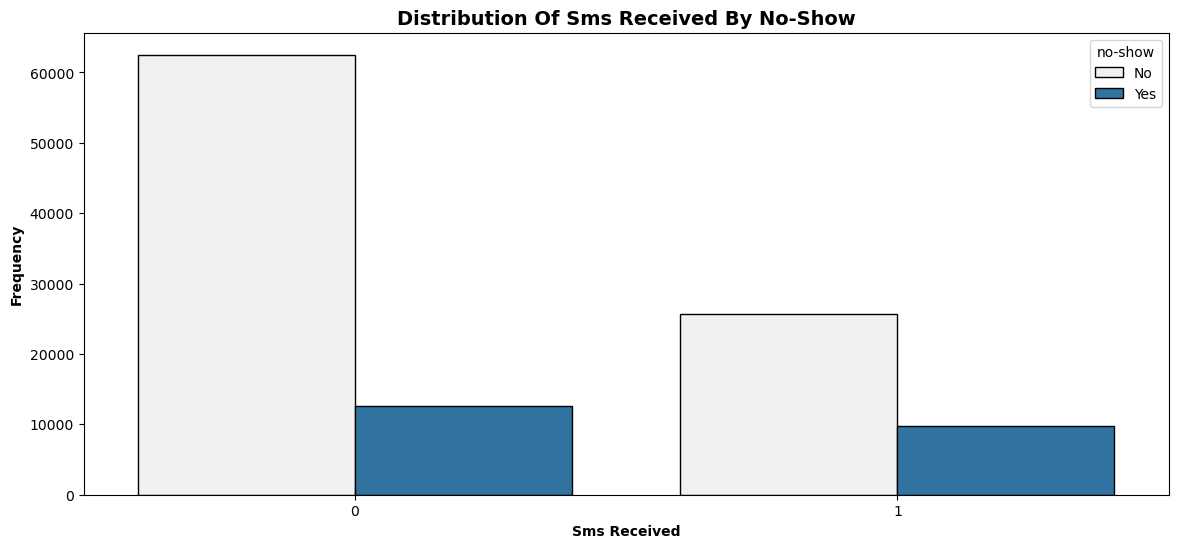

In [51]:
count_plot(df, 'sms_received', huevar = "no-show")

__Answer__ 
The number of patient that did not received sms messages still turned up for their appointments. Clearly, receiving an sms does not play an importmant role in determing whether or not a patient will show up for their appointments

__Question 5__
Does having an underlying disease determine whether or not a patient will show up for their appointment?


In [76]:
df.groupby('hipertension')['no-show'].value_counts(), df.groupby('diabetes')['no-show'].value_counts(), df.groupby('alcoholism')['no-show'].value_counts()


(hipertension  no-show
 0             No         70179
               Yes        18547
 1             No         18029
               Yes         3772
 Name: no-show, dtype: int64,
 diabetes  no-show
 0         No         81695
           Yes        20889
 1         No          6513
           Yes         1430
 Name: no-show, dtype: int64,
 alcoholism  no-show
 0           No         85525
             Yes        21642
 1           No          2683
             Yes          677
 Name: no-show, dtype: int64)

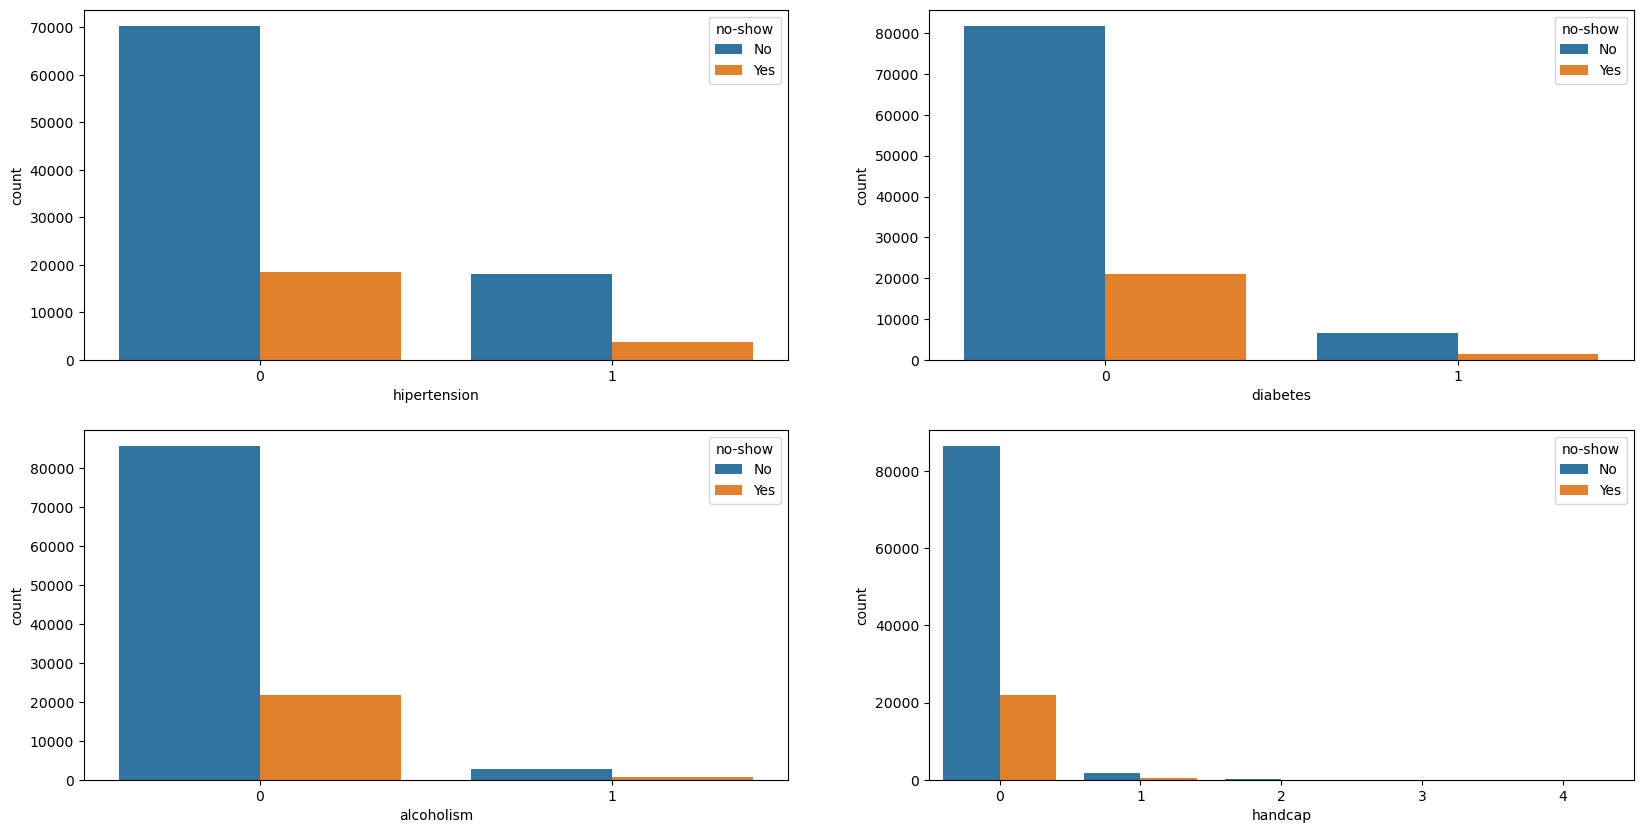

In [57]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
sns.countplot(data=df, x= 'hipertension', hue = 'no-show')
plt.subplot(2,2,2)
sns.countplot(data=df, x= 'diabetes', hue = 'no-show')
plt.subplot(2,2,3)
sns.countplot(data=df, x= 'alcoholism', hue = 'no-show')
plt.subplot(2,2,4)
sns.countplot(data=df, x= 'handcap', hue = 'no-show');

__Answer__ From the above statistics and graphs, we can see that a patient showing up for their appointments does not depend on whether or not the patient has a disease.

### Research Question 2  (Replace this header name!)

<a id='conclusions'></a>
## Conclusions & Limitations

Condidering whether or not a patient will show for their appointments,there is no Significant difference between:

Gender,
Receiving SMS or not
Patients with scholarship or not

Therefore, it is evident to say that that Gender, Receiving SMS or not
and Patients with scholarship or not has no significant impact on show up. However, the location a patient is staying has significant impact on show up.

Note: Futher analysis such as logistics regression, classification  will be need to make accurate prediction of variables that will likely influnce whether or not a patient will show up for their appointment.

